<a href="https://colab.research.google.com/github/Gabriel1000000/IA_aps-arvore-de-deci-o-/blob/main/IA_aps(arvore_de_deci%C3%A7%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Referente a Parte 1 e 2:
#Bibliotecas de Coleta de Dados
import numpy as np
import pandas as pd

#Referente a Parte 3:
#A biblioteca "sklearn.model_selection" fornece funções para dividir dados em conjuntos de treinamento e teste, facilitando a avaliação de modelos de aprendizado de máquina.
from sklearn.model_selection import train_test_split

#Referente a Parte 4 :
#A biblioteca "sklearn.tree" oferece ferramentas para construir modelos de árvore de decisão em aprendizado de máquina, usados para tarefas como classificação e regressão.
from sklearn.tree import DecisionTreeClassifier

#Referente a Parte 5:
#A biblioteca "sklearn.metrics" fornece funções para calcular métricas de desempenho, como acurácia, precisão, recall e a matriz de confusão, que são usadas para avaliar o desempenho de modelos de aprendizado de máquina.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#Referente a Parte 6:
#A biblioteca "sklearn.tree" fornece a função "plot_tree" para visualizar árvores de decisão criadas em modelos de aprendizado de máquina, auxiliando na compreensão das decisões tomadas pelo modelo.
from sklearn.tree import plot_tree
#A biblioteca "matplotlib.pyplot" é usada para criar visualizações gráficas em Python, incluindo gráficos, plots e figuras.
import matplotlib.pyplot as plt


In [ ]:
#Parte 1: Importando dados
dados = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Parte 2: Pré-processamento dos Dados
df=pd.get_dummies(data=dados, columns=['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Columns: 674 entries, DEATH_EVENT to time_285
dtypes: int64(1), uint8(673)
memory usage: 199.0 KB


,DEATH_EVENT,age_40.0,age_41.0,age_42.0,age_43.0,age_44.0,age_45.0,age_46.0,age_47.0,age_48.0,...,time_247,time_250,time_256,time_257,time_258,time_270,time_271,time_278,time_280,time_285
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
296,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
297,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Parte 3 : Transformação dos Dados, Treindo e Testando
x = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=101)

In [ ]:
#Parte 4 : Mineração de dados
decision = DecisionTreeClassifier(criterion='entropy',max_depth=5)
decision.fit(x_treino, y_treino)
predictions = decision.predict( x_teste)

In [ ]:
# Parte 5: Cálculo de métricas de desempenho
accuracy = accuracy_score(y_teste, predictions)
precision = precision_score(y_teste, predictions)
recall = recall_score(y_teste, predictions)
confusion = confusion_matrix(y_teste, predictions)

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print('Matriz de Confusão:')
print(confusion)


Acurácia: 0.7555555555555555
Precisão: 0.875
Recall: 0.25
Matriz de Confusão:
[[61  1]
 [21  7]]


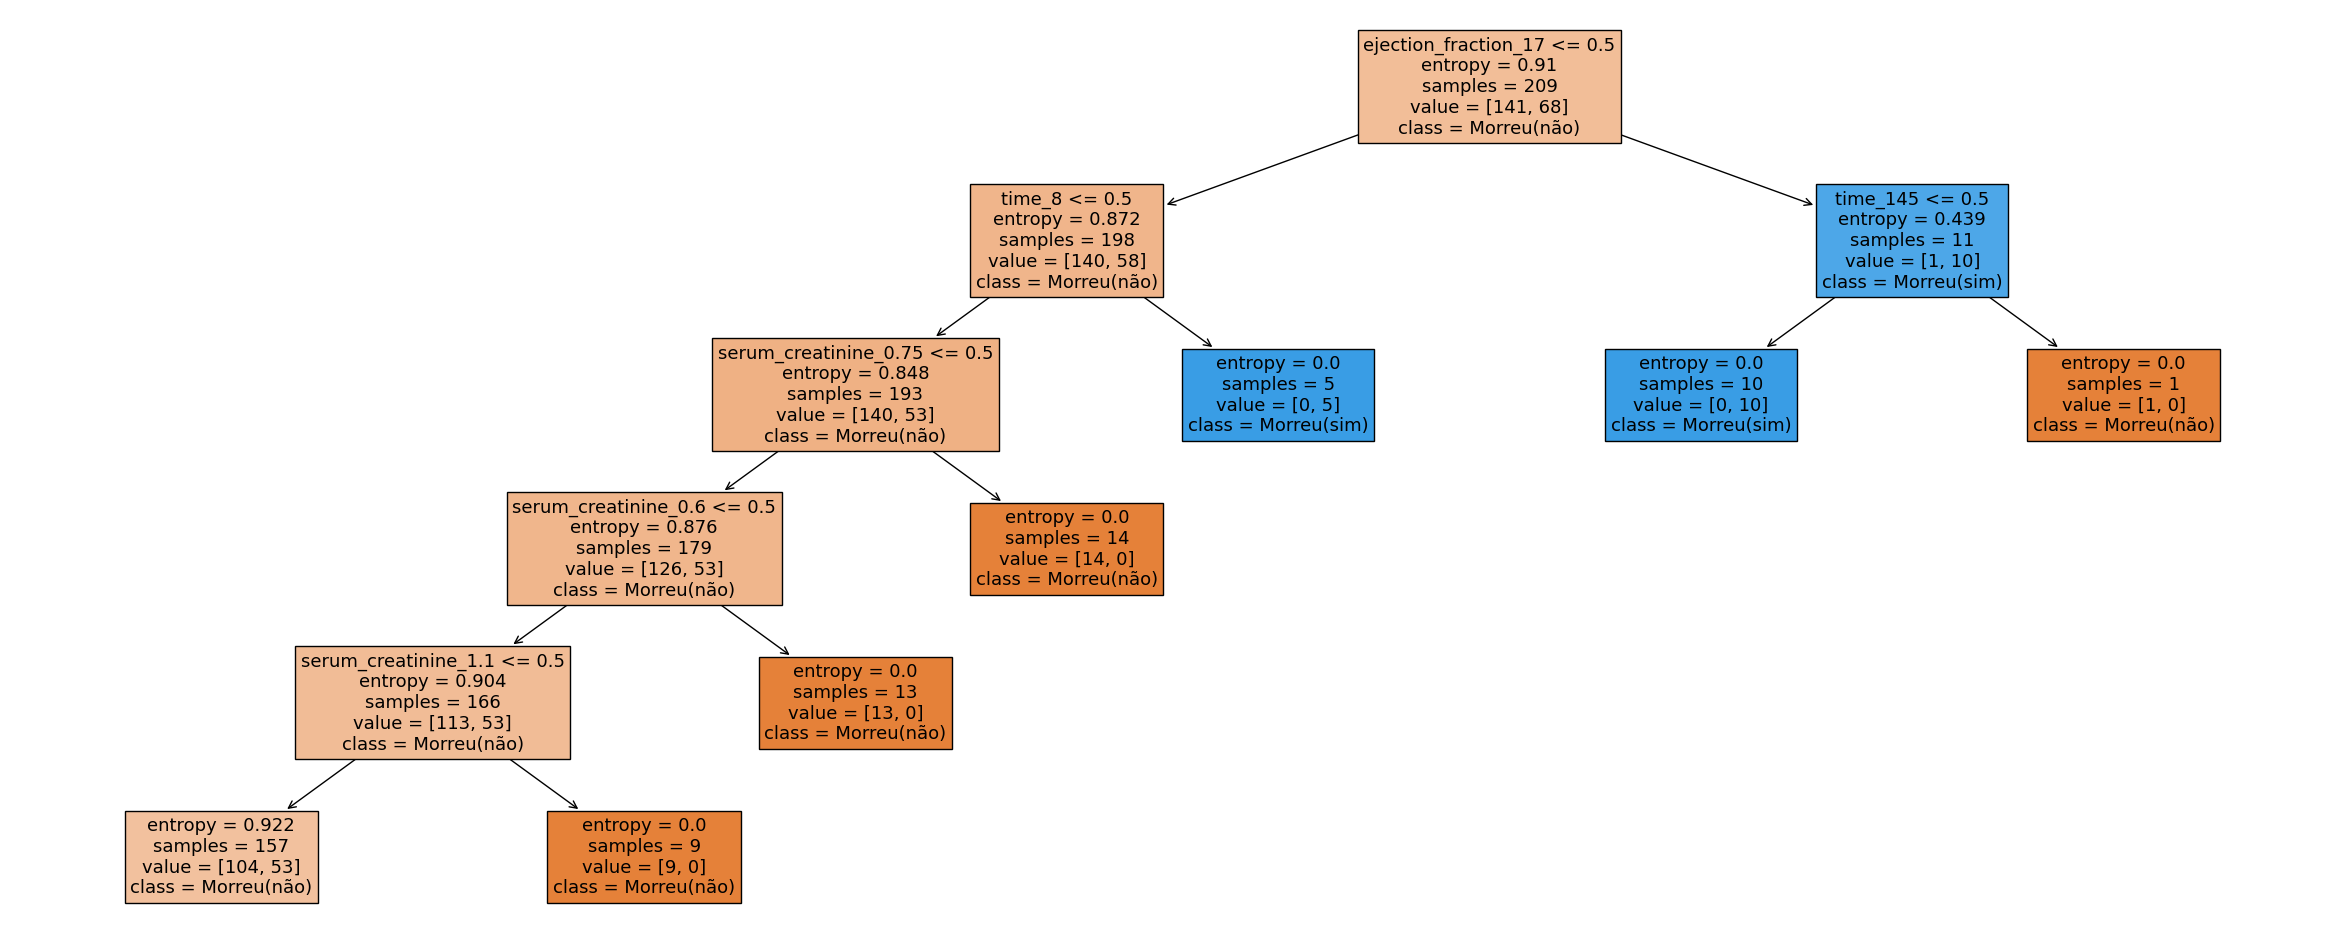

In [ ]:
#Parte 6 : Avaliação dos dados
img = plt.figure(figsize=(30,12))
arvore = plot_tree(decision, feature_names=df.columns, fontsize=13, filled=True, class_names=['Morreu(não)', 'Morreu(sim)'])